<a href="https://colab.research.google.com/github/KARRIRAJKUMAR/AI_ML_Avanthi_RAJ-KUMAR/blob/main/multilinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/carprices (1) (2).csv')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [ ]:
#x=df[['mileage','Age(yrs)']]
x= df.drop('Sell Price($)',axis='columns')
y=df['Sell Price($)']

In [ ]:
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([24371.40312859, 19115.28281158, 33777.79222813, 16527.73278052,
       15000.45657283, 23230.10905034])

In [ ]:
print(regressor.coef_)

[-4.49198885e-01  1.27556038e+03]


In [ ]:
print(regressor.intercept_)

45673.07205977793


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.905032022095936

multilinear regression

1.data collection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2.read the data

In [2]:
df=pd.read_csv('/content/1000_Companies.csv')
df


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [ ]:
#df.head()

In [3]:

X= df.drop('Profit',axis='columns')
y=df['Profit']

In [4]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [ ]:
#X = df.iloc[:, :-1].values
#y = df.iloc[:, 4].values

3. Heatmap(correlation)

<ipython-input-5-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

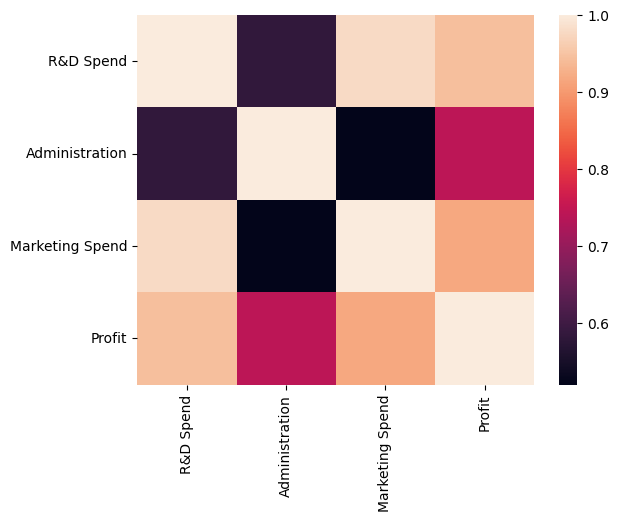

In [5]:
sns.heatmap(df.corr())

4&5. Identify categorical data &one hot encoding

In [6]:
dummies=pd.get_dummies(df['State'])
dummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [7]:
merged=pd.concat([X,dummies],axis='columns')
merged

,R&D Spend,Administration,Marketing Spend,State,California,Florida,New York
0,165349.20,136897.800,471784.1000,New York,0,0,1
1,162597.70,151377.590,443898.5300,California,1,0,0
2,153441.51,101145.550,407934.5400,Florida,0,1,0
3,144372.41,118671.850,383199.6200,New York,0,0,1
4,142107.34,91391.770,366168.4200,Florida,0,1,0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,1,0,0
996,134970.00,130390.080,329204.0228,California,1,0,0
997,100275.47,241926.310,227142.8200,California,1,0,0
998,128456.23,321652.140,281692.3200,California,1,0,0


In [9]:
x=merged.drop(['State','California'],axis='columns')
x

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.800,471784.1000,0,1
1,162597.70,151377.590,443898.5300,0,0
2,153441.51,101145.550,407934.5400,1,0
3,144372.41,118671.850,383199.6200,0,1
4,142107.34,91391.770,366168.4200,1,0
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,0
996,134970.00,130390.080,329204.0228,0,0
997,100275.47,241926.310,227142.8200,0,0
998,128456.23,321652.140,281692.3200,0,0


6.split data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
X_train

,R&D Spend,Administration,Marketing Spend,Florida,New York
504,100506.0,125300.2795,262705.64060,0,1
213,30713.0,114992.9313,128039.85660,1,0
753,107178.0,126285.6308,275579.28290,0,0
648,117577.0,127821.4025,295644.18180,0,1
597,9960.0,111928.0338,87996.88638,1,0
...,...,...,...,...,...
804,107501.0,126333.3330,276202.51220,0,0
312,84406.0,122922.5582,231640.64670,1,0
416,93533.0,124270.4751,249251.21810,0,1
218,6166.0,111367.7186,80676.35302,0,1


7. model training

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

8. predictio

In [20]:
y_pred = model.predict(X_test)
y_pred

array([ 99265.68044106, 127648.18508049, 130889.96113717, 141965.95782713,
        75802.10704604, 103314.24890716, 138340.9635903 ,  72408.23859218,
        83813.75864056, 103150.56515349, 159764.35211388,  90398.24856063,
       100902.46377844, 172564.35996103,  58921.76415913, 156883.45493894,
        87700.79677726,  53774.69815989,  92443.16693493, 178605.84637824,
       139663.29154731,  82035.6175669 , 158471.26357436, 185532.3235144 ,
        88047.91506397,  89960.05462696, 173497.45529886,  56225.14756066,
       109802.95634151, 183436.29039262, 116495.70599242,  74706.62205655,
       136260.42015388, 108360.13746374,  71199.78702874, 185583.01655022,
       186204.64512337, 111491.29182842,  85595.29905916, 107621.84872645,
       163405.67122313, 159499.73055787,  88293.21239283, 135931.75601561,
       108396.00468508, 103281.16418707, 104647.73333882,  88815.59503326,
       158668.88051184, 160420.37290094, 124873.3916832 ,  65454.70192706,
       173862.16873111, 1

9. model metrics/score

In [21]:
print(model.coef_)

[ 6.17913186e-01  1.06460336e+00  4.35683136e-02 -5.56353147e+02
  1.82575419e+02]


In [22]:
print(model.intercept_)

-71385.41264572897


In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9799503398187202

example3

In [55]:
df=pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [56]:
X= df.drop('owner',axis='columns')
y=df['owner']

<ipython-input-57-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

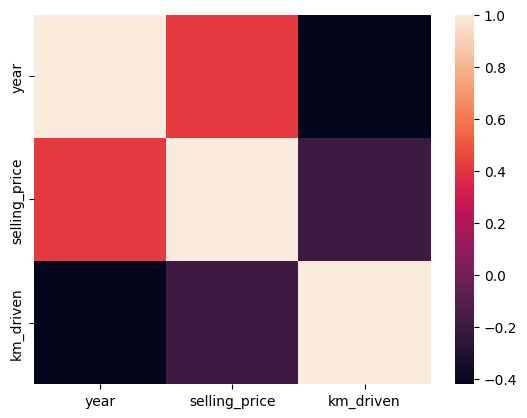

In [57]:
sns.heatmap(df.corr())

In [60]:
dummies1=pd.get_dummies(df['fuel'])
dummies2=pd.get_dummies(df[['seller_type']])
dummies3=pd.get_dummies(df['transmission'])

In [61]:
merged=pd.concat([X,dummies1,dummies2,dummies3],axis='columns')
merged

,name,year,selling_price,km_driven,fuel,seller_type,transmission,CNG,Diesel,Electric,LPG,Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,Automatic,Manual
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0,0,0,0,1,0,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,0,0,0,0,1,0,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,0,1,0,0,0,0,1,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,0,0,0,0,1,0,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,0,1,0,0,0,0,1,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,0,1,0,0,0,0,1,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,0,0,0,0,1,0,1,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,0,1,0,0,0,0,1,0,0,1


Binary logistic regression



In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
df=pd.read_csv('/content/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


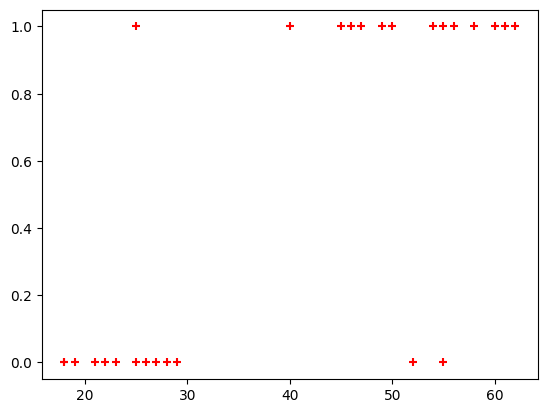

In [35]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [38]:
X_test

,age
19,18
8,62
15,55
11,28
7,60
24,50


In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_predict=model.predict(X_test)

In [44]:
model.predict_proba(X_test)

array([[0.92152291, 0.07847709],
       [0.06710391, 0.93289609],
       [0.13926118, 0.86073882],
       [0.78670958, 0.21329042],
       [0.08313853, 0.91686147],
       [0.22401299, 0.77598701]])

In [46]:
y_predict

array([0, 1, 1, 0, 1, 1])

In [48]:
model.coef_

array([[0.11580164]])

In [50]:
model.intercept_

array([-4.54765048])

In [51]:
model.score(X_test,y_test)

1.0